In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [3]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
data.shape

(8599212, 7)

In [5]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [6]:
data.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [7]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
data['DT'] = pd.to_datetime(data['dt'])

In [11]:
data['Year'] = data['DT'].dt.year

In [14]:
data.drop(['dt','DT'], axis =1)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743
2,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
3,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
4,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...
8599207,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013
8599210,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E,2013


In [15]:
city_annual_avg_temp = data.groupby(['City','Country', 'Year'])['AverageTemperature'].mean().reset_index()

In [17]:
country_annual_avg_temp = data.groupby(['Country','Year'])['AverageTemperature'].mean().reset_index()

In [24]:
country_annual_avg_temp.shape

(32881, 3)

In [25]:
country_annual_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32881 entries, 0 to 32880
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             32881 non-null  object 
 1   Year                32881 non-null  int32  
 2   AverageTemperature  31556 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 642.3+ KB


In [30]:
country_annual_avg_temp.isnull().sum()

Country                  0
Year                     0
AverageTemperature    1325
dtype: int64

In [20]:
data['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [31]:
country_annual_avg_temp.sort_values(by = ['Country','Year'], inplace = True)

In [40]:
def missing_temp(df):
    countries = df['Country'].unique()
    filled_data = pd.DataFrame()
    for country in countries:
        country_data = df[df['Country']==country].copy()
        country_data['AverageTemperature'] = country_data['AverageTemperature'].interpolate(method='linear', limit_direction ='forward')
        for i in range(len(country_data)):
            if pd.isna(country_data.iloc[i]['AverageTemperature']):
                start_idx = max(0, i-5)
                end_index=i
                past_5yrs = country_data.iloc[start_idx:end_idx]['AverageTemperature']
                if past_5yrs.count() > 0:
                    country_data.at[country_data.index[i], 'AverageTemperature'] = past_5yrs.mean()
        filled_data = pd.concat([filled_data, country_data])
    return filled_data
                


In [41]:
filled_temperature_data = missing_temp(country_annual_avg_temp)

In [56]:
filled_temperature_data.to_csv('filled_temp.csv', index = False)

In [57]:
df_temp = pd.read_csv('filled_temp.csv')

In [58]:
df

,Country,Year,AverageTemperature
0,Afghanistan,1833,13.091150
1,Afghanistan,1834,13.093600
2,Afghanistan,1835,13.959233
3,Afghanistan,1836,13.937040
4,Afghanistan,1837,13.914846
...,...,...,...
32876,Zimbabwe,2009,20.106405
32877,Zimbabwe,2010,20.741714
32878,Zimbabwe,2011,20.366060
32879,Zimbabwe,2012,20.218274


In [59]:
df2 = pd.read_csv("ghg-emissions-by-gas.csv")

In [60]:
df2.head()

,Country,Code,Year,Annual nitrous oxide emissions in CO₂ equivalents,Annual methane emissions in CO₂ equivalents,Annual CO₂ emissions
0,Afghanistan,AFG,1850,223008.40,3594926.5,3520884.0
1,Afghanistan,AFG,1851,227659.61,3615134.5,3561188.2
2,Afghanistan,AFG,1852,232190.92,3635346.8,3596619.0
3,Afghanistan,AFG,1853,236528.19,3655563.5,3630340.0
4,Afghanistan,AFG,1854,240597.22,3675785.0,3662827.5


In [61]:
df2.shape

(41520, 6)

In [62]:
df2.isnull().sum()

Country                                                 0
Code                                                 3979
Year                                                    0
Annual nitrous oxide emissions in CO₂ equivalents    3460
Annual methane emissions in CO₂ equivalents          4325
Annual CO₂ emissions                                    0
dtype: int64

In [63]:
merged_data = pd.merge(df, df2 , on = ['Country','Year'], how='inner')
merged_data.head()

,Country,Year,AverageTemperature,Code,Annual nitrous oxide emissions in CO₂ equivalents,Annual methane emissions in CO₂ equivalents,Annual CO₂ emissions
0,Afghanistan,1850,13.185427,AFG,223008.40,3594926.5,3520884.0
1,Afghanistan,1851,13.391073,AFG,227659.61,3615134.5,3561188.2
2,Afghanistan,1852,13.337948,AFG,232190.92,3635346.8,3596619.0
3,Afghanistan,1853,13.270833,AFG,236528.19,3655563.5,3630340.0
4,Afghanistan,1854,13.481042,AFG,240597.22,3675785.0,3662827.5


In [64]:
merged_data.shape

(24248, 7)

In [65]:
merged_data

,Country,Year,AverageTemperature,Code,Annual nitrous oxide emissions in CO₂ equivalents,Annual methane emissions in CO₂ equivalents,Annual CO₂ emissions
0,Afghanistan,1850,13.185427,AFG,223008.40,3594926.5,3520884.0
1,Afghanistan,1851,13.391073,AFG,227659.61,3615134.5,3561188.2
2,Afghanistan,1852,13.337948,AFG,232190.92,3635346.8,3596619.0
3,Afghanistan,1853,13.270833,AFG,236528.19,3655563.5,3630340.0
4,Afghanistan,1854,13.481042,AFG,240597.22,3675785.0,3662827.5
...,...,...,...,...,...,...,...
24243,Zimbabwe,2009,20.106405,ZWE,5801720.50,12969491.0,25019444.0
24244,Zimbabwe,2010,20.741714,ZWE,6143349.00,13484060.0,29073518.0
24245,Zimbabwe,2011,20.366060,ZWE,6285581.00,13840859.0,25961384.0
24246,Zimbabwe,2012,20.218274,ZWE,5845067.00,13644580.0,23363448.0


In [67]:
merged_data.to_csv('merged_data.csv', index = False)

In [68]:
data = pd.read_csv('merged_data.csv')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24248 entries, 0 to 24247
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            24248 non-null  object 
 1   Year                                               24248 non-null  int64  
 2   AverageTemperature                                 24248 non-null  float64
 3   Code                                               24248 non-null  object 
 4   Annual nitrous oxide emissions in CO₂ equivalents  24248 non-null  float64
 5   Annual methane emissions in CO₂ equivalents        24248 non-null  float64
 6   Annual CO₂ emissions                               24248 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [70]:
data.describe()

,Year,AverageTemperature,Annual nitrous oxide emissions in CO₂ equivalents,Annual methane emissions in CO₂ equivalents,Annual CO₂ emissions
count,24248.000000,24248.000000,2.424800e+04,2.424800e+04,2.424800e+04
mean,1932.077697,18.357837,6.331687e+06,2.609767e+07,8.666723e+07
std,47.062993,7.646868,2.280564e+07,8.424309e+07,3.708185e+08
min,1850.000000,-5.113667,8.214933e+02,6.074317e+03,-1.346242e+07
25%,1891.000000,11.406250,2.221345e+05,1.174255e+06,2.466678e+06
50%,1932.000000,19.976542,9.154416e+05,4.409132e+06,1.058359e+07
75%,1973.000000,25.421622,4.107553e+06,1.565247e+07,4.102909e+07
max,2013.000000,31.082625,4.485133e+08,1.655194e+09,9.839691e+09


In [71]:
data.isnull().sum()

Country                                              0
Year                                                 0
AverageTemperature                                   0
Code                                                 0
Annual nitrous oxide emissions in CO₂ equivalents    0
Annual methane emissions in CO₂ equivalents          0
Annual CO₂ emissions                                 0
dtype: int64

In [90]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
features = ['Year','Annual nitrous oxide emissions in CO₂ equivalents','Annual methane emissions in CO₂ equivalents','Annual CO₂ emissions']   

In [92]:
x = data[features]
y = data['AverageTemperature']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [94]:
model_params = {
    'Linear Regression': {
        'pipeline': Pipeline([
            ('model', LinearRegression())
        ]),
        'params': {}
    },
    'Polynomial Regression': {
        'pipeline': Pipeline([
            ('poly_features', PolynomialFeatures()),
            ('model', LinearRegression())
        ]),
        'params': {
            'poly_features__degree': [2, 3, 4]
        }
    },
    'SVR': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()), 
            ('model', SVR())
        ]),
        'params': {
            'model__kernel': ['linear', 'rbf'],
            'model__C': [0.1, 1, 10],
            'model__gamma': ['scale', 'auto']
        }
    },
    'Ridge Regression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()), 
            ('model', Ridge())
        ]),
        'params': {
            'model__alpha': [0.1, 1, 10]
        }
    },
    'Lasso Regression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()), 
            ('model', Lasso())
        ]),
        'params': {
            'model__alpha': [0.01, 0.1, 1, 10]
        }
    },
    'Decision Tree': {
        'pipeline': Pipeline([
            ('model', DecisionTreeRegressor())
        ]),
        'params': {
            'model__max_depth': [3, 5, 10, None],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'pipeline': Pipeline([
            ('model', RandomForestRegressor(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [3, 5, 10, None]
        }
    },
    'Gradient Boosting': {
        'pipeline': Pipeline([
            ('model', GradientBoostingRegressor())
        ]),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'KNN Regression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()), 
            ('model', KNeighborsRegressor())
        ]),
        'params': {
            'model__n_neighbors': [3, 5, 7, 10]
        }
    }
}



In [103]:
results = {}
for name, model_info in model_params.items():
    grid_search = GridSearchCV(model_info['pipeline'], model_info['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'best params': grid_search.best_params_,
        'R2SCORE':r2,
        'mae':mae,
        'mse':mse,
        'rmse':rmse
    }
    print(f"BEST PARAMS:{grid_search.best_params_}")
    print(f"{name}-> r2:{r2:.4f},mae:{mae:.4f}, rmse:{rmse:.4f}")
        
    

BEST PARAMS:{}
Linear Regression-> r2:0.0175,mae:6.5288, rmse:7.5304
BEST PARAMS:{'poly_features__degree': 2}
Polynomial Regression-> r2:0.0721,mae:6.2967, rmse:7.3182
BEST PARAMS:{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
SVR-> r2:0.1519,mae:5.4293, rmse:6.9964
BEST PARAMS:{'model__alpha': 10}
Ridge Regression-> r2:0.0175,mae:6.5288, rmse:7.5303
BEST PARAMS:{'model__alpha': 0.01}
Lasso Regression-> r2:0.0177,mae:6.5285, rmse:7.5295
BEST PARAMS:{'model__max_depth': None, 'model__min_samples_split': 10}
Decision Tree-> r2:0.7173,mae:1.7598, rmse:4.0391
BEST PARAMS:{'model__max_depth': None, 'model__n_estimators': 200}
Random Forest-> r2:0.8732,mae:1.5439, rmse:2.7057
BEST PARAMS:{'model__learning_rate': 0.2, 'model__n_estimators': 200}
Gradient Boosting-> r2:0.5118,mae:4.1561, rmse:5.3080
BEST PARAMS:{'model__n_neighbors': 5}
KNN Regression-> r2:0.4567,mae:3.9574, rmse:5.5999


In [104]:
results_df = pd.DataFrame(results).T

In [105]:
results_df

,best params,R2SCORE,mae,mse,rmse
Linear Regression,{},0.017486,6.528772,56.706556,7.530376
Polynomial Regression,{'poly_features__degree': 2},0.072064,6.29665,53.556536,7.318233
SVR,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.151889,5.429293,48.949354,6.996382
Ridge Regression,{'model__alpha': 10},0.0175,6.528752,56.705749,7.530322
Lasso Regression,{'model__alpha': 0.01},0.017712,6.528509,56.693467,7.529506
Decision Tree,"{'model__max_depth': None, 'model__min_samples...",0.717337,1.759827,16.314096,4.039071
Random Forest,"{'model__max_depth': None, 'model__n_estimator...",0.873157,1.543896,7.320846,2.705706
Gradient Boosting,"{'model__learning_rate': 0.2, 'model__n_estima...",0.511835,4.156078,28.174829,5.307997
KNN Regression,{'model__n_neighbors': 5},0.456661,3.957355,31.359215,5.59993


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

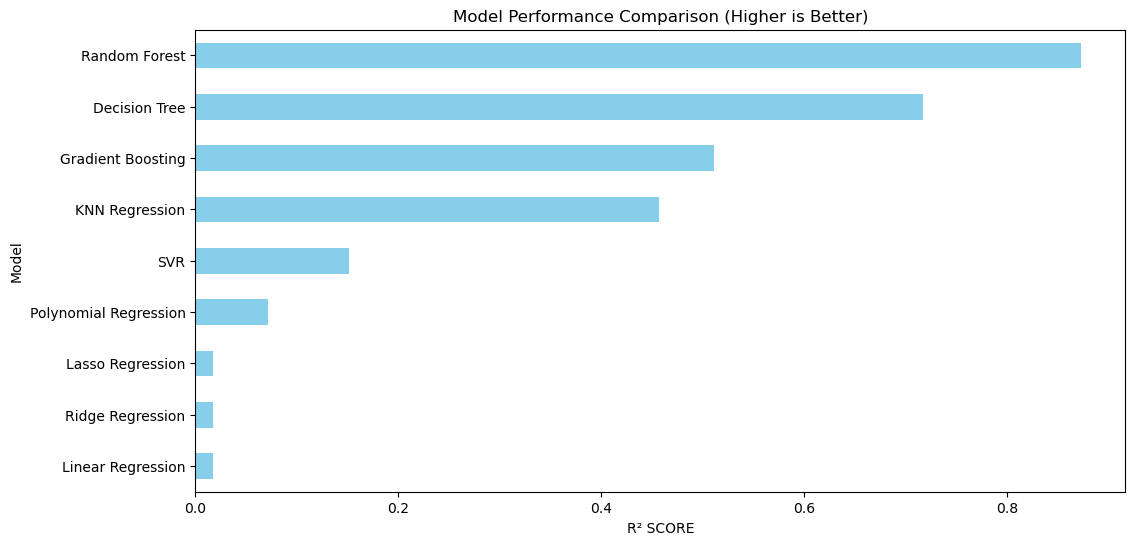

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
results_df['R2SCORE'].sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("R² SCORE")
plt.ylabel("Model")
plt.title("Model Performance Comparison (Higher is Better)")
plt.show()